In [126]:
from typing import List, Dict

# from oop_functions.experiment_helper import *
# from oop_functions.experiment_runner import ExperimentRunner
# from oop_functions.util_functions import *
# from oop_functions.visualization_util import *
from oop_functions.analytics_cv_util import *
from oop_functions.analytics_utils import *

%matplotlib inline
import warnings

warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns

from xgboost import XGBClassifier

import itertools


In [127]:
filesuffix = '_for_experiment_participants_screened_single_first_5_top_50_features_RandomForestClassifier_cancer_in_next_1_years__1_trials'
cv_analytics_util = load_cv_analytics_utils_no_datasets(filesuffix)

In [128]:
# cv_analytics_util = CvAnalyticsUtil.load_cv_analytics_utils(filesuffix)
# full_dataset = cv_analytics_util.get_dataset_with_predictions()
# cols = cv_analytics_util.analytics_utils[0].data_util.get_test_data()[0].columns

In [129]:
cols = ["plco_id", "cancer_in_next_1_years", 'bmi_20', 'bmi_50', 'bmi_curr', 'brothers', 'ca125_result',
       'ca125ii_level', 'ca125ii_level_binary', 'cig_years', 'detl_p',
       'detr_p', 'educat', 'height_f', 'lantero_p', 'llong_p', 'ltran_p',
       'maxdi', 'numcyst', 'occupat', 'ovar_result', 'ovary_diam',
       'ovary_diaml', 'ovary_diamr', 'ovary_vol', 'ovary_voll', 'ovary_volr',
       'ovcyst_diam', 'ovcyst_diaml', 'ovcyst_diamr', 'ovcyst_morph',
       'ovcyst_sum', 'ovcyst_sumr', 'ovcyst_vol', 'ovcyst_voll', 'ovcyst_volr',
       'pack_years', 'prega', 'rantero_p', 'rlong_p', 'rtran_p', 'sisters',
       'tvu_ref', 'tvu_result', 'visboth', 'viseith', 'visl', 'visr', 'volum',
       'weight20_f', 'weight50_f', 'weight_f']

validation_df = pd.read_csv("ovarian_cancer_external_validation.csv")
validation_df = validation_df.rename(columns={"PatientID": "plco_id", "ovariancancer": "cancer_in_next_1_years"})
validation_df = validation_df.replace("-", np.nan)
validation_df.drop("Unnamed: 85", axis=1, inplace=True)
validation_df = validation_df[cols]
validation_df.loc[validation_df['ca125ii_level'] < 35, 'ca125ii_level_binary'] = 1
validation_df.loc[validation_df['ca125ii_level'] >= 35 , 'ca125ii_level_binary'] = 2
validation_df.loc[90, "ovcyst_diaml"] = 8
validation_df.loc[135, "prega"] = 15
validation_df = validation_df.apply(pd.to_numeric)
validation_df[['was_screened', 'index', 'ovar_cancer_years', 'is_ultra_screening_record', 'ovar_cancer', 'ovar_observe_year', 'is_ca125_screening_record', 'study_yr']] = np.nan
validation_df = cv_analytics_util.analytics_utils[0].data_util.imputer.imputer_transform(validation_df)

In [130]:
cv_analytics_util.analytics_utils[0].data_util.test_df = validation_df

In [131]:
# Predicting actual cancer probability using bucketing
per_thereshold_metrics = pd.read_csv('./per_threshold_metrics/_for_experiment_participants_screened_single_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials.csv')

Threshold: 0.0206666666666666


Cross-Validation measures:
+--------------------+----------+-------+----------+----------+
|                    |     mean |   std |      min |      max |
|--------------------+----------+-------+----------+----------|
| precision__class_0 | 0.979167 |   nan | 0.979167 | 0.979167 |
| recall__class_0    | 0.655052 |   nan | 0.655052 | 0.655052 |
| f1-score__class_0  | 0.784969 |   nan | 0.784969 | 0.784969 |
| precision__class_1 | 0.297872 |   nan | 0.297872 | 0.297872 |
| recall__class_1    | 0.913043 |   nan | 0.913043 | 0.913043 |
| f1-score__class_1  | 0.449198 |   nan | 0.449198 | 0.449198 |
| accuracy           | 0.690691 |   nan | 0.690691 | 0.690691 |
| auc                | 0.891115 |   nan | 0.891115 | 0.891115 |
+--------------------+----------+-------+----------+----------+


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


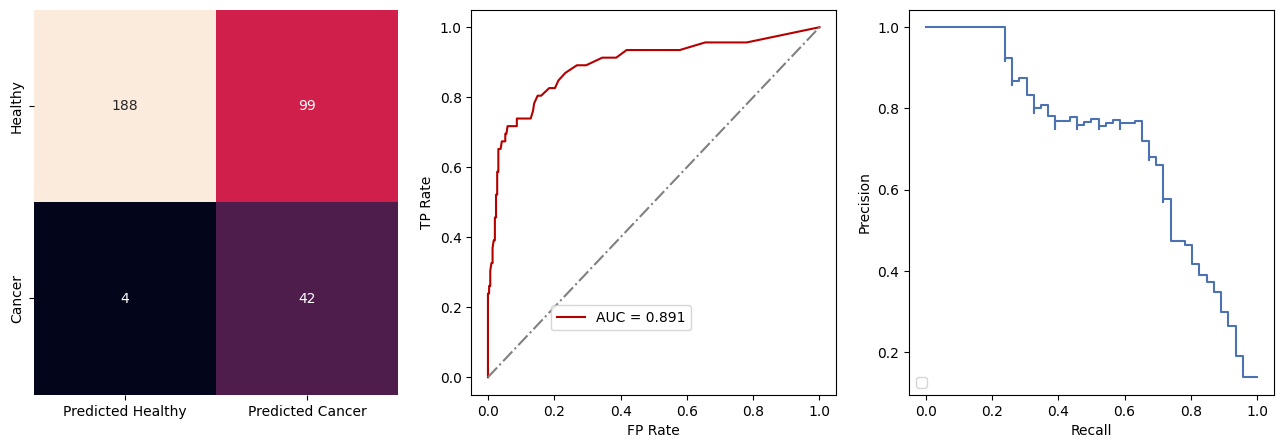

Threshold: 0.168


Cross-Validation measures:
+--------------------+----------+-------+----------+----------+
|                    |     mean |   std |      min |      max |
|--------------------+----------+-------+----------+----------|
| precision__class_0 | 0.948097 |   nan | 0.948097 | 0.948097 |
| recall__class_0    | 0.954704 |   nan | 0.954704 | 0.954704 |
| f1-score__class_0  | 0.951389 |   nan | 0.951389 | 0.951389 |
| precision__class_1 | 0.704545 |   nan | 0.704545 | 0.704545 |
| recall__class_1    | 0.673913 |   nan | 0.673913 | 0.673913 |
| f1-score__class_1  | 0.688889 |   nan | 0.688889 | 0.688889 |
| accuracy           | 0.915916 |   nan | 0.915916 | 0.915916 |
| auc                | 0.891115 |   nan | 0.891115 | 0.891115 |
+--------------------+----------+-------+----------+----------+


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


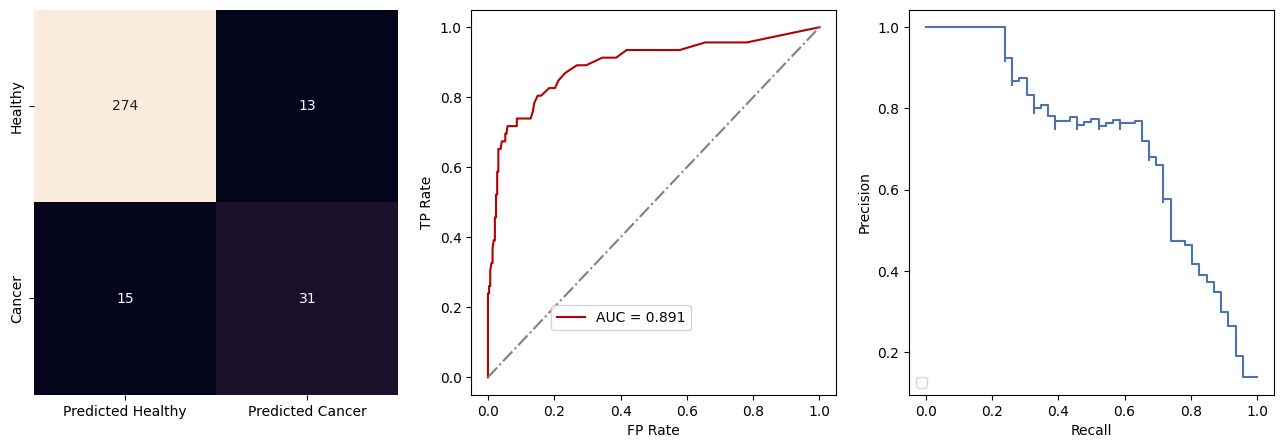

Threshold: 0.2639999999999999


Cross-Validation measures:
+--------------------+----------+-------+----------+----------+
|                    |     mean |   std |      min |      max |
|--------------------+----------+-------+----------+----------|
| precision__class_0 | 0.93     |   nan | 0.93     | 0.93     |
| recall__class_0    | 0.972125 |   nan | 0.972125 | 0.972125 |
| f1-score__class_0  | 0.950596 |   nan | 0.950596 | 0.950596 |
| precision__class_1 | 0.757576 |   nan | 0.757576 | 0.757576 |
| recall__class_1    | 0.543478 |   nan | 0.543478 | 0.543478 |
| f1-score__class_1  | 0.632911 |   nan | 0.632911 | 0.632911 |
| accuracy           | 0.912913 |   nan | 0.912913 | 0.912913 |
| auc                | 0.891115 |   nan | 0.891115 | 0.891115 |
+--------------------+----------+-------+----------+----------+


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


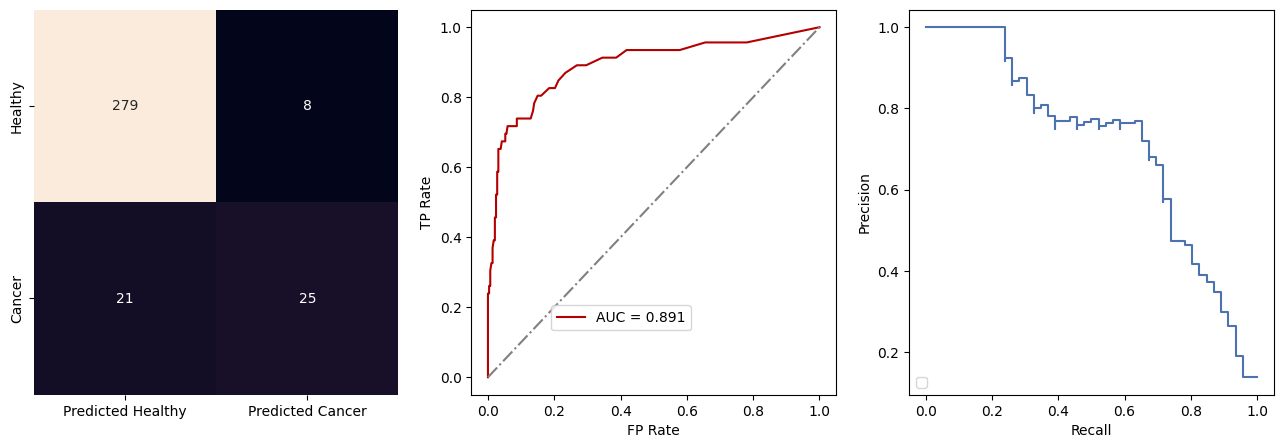

Threshold: 0.5213333333333336


Cross-Validation measures:
+--------------------+----------+-------+----------+----------+
|                    |     mean |   std |      min |      max |
|--------------------+----------+-------+----------+----------|
| precision__class_0 | 0.890966 |   nan | 0.890966 | 0.890966 |
| recall__class_0    | 0.996516 |   nan | 0.996516 | 0.996516 |
| f1-score__class_0  | 0.940789 |   nan | 0.940789 | 0.940789 |
| precision__class_1 | 0.916667 |   nan | 0.916667 | 0.916667 |
| recall__class_1    | 0.23913  |   nan | 0.23913  | 0.23913  |
| f1-score__class_1  | 0.37931  |   nan | 0.37931  | 0.37931  |
| accuracy           | 0.891892 |   nan | 0.891892 | 0.891892 |
| auc                | 0.891115 |   nan | 0.891115 | 0.891115 |
+--------------------+----------+-------+----------+----------+


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


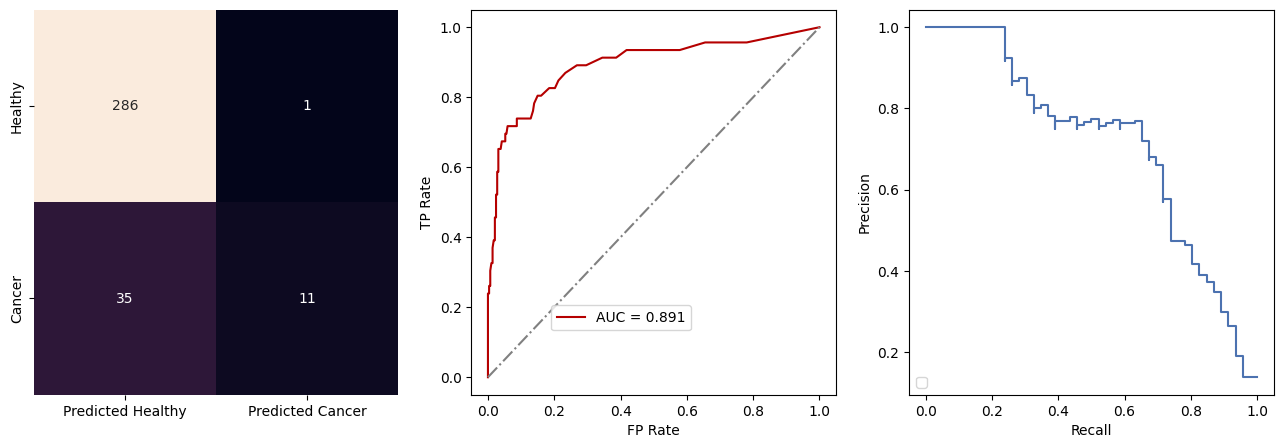

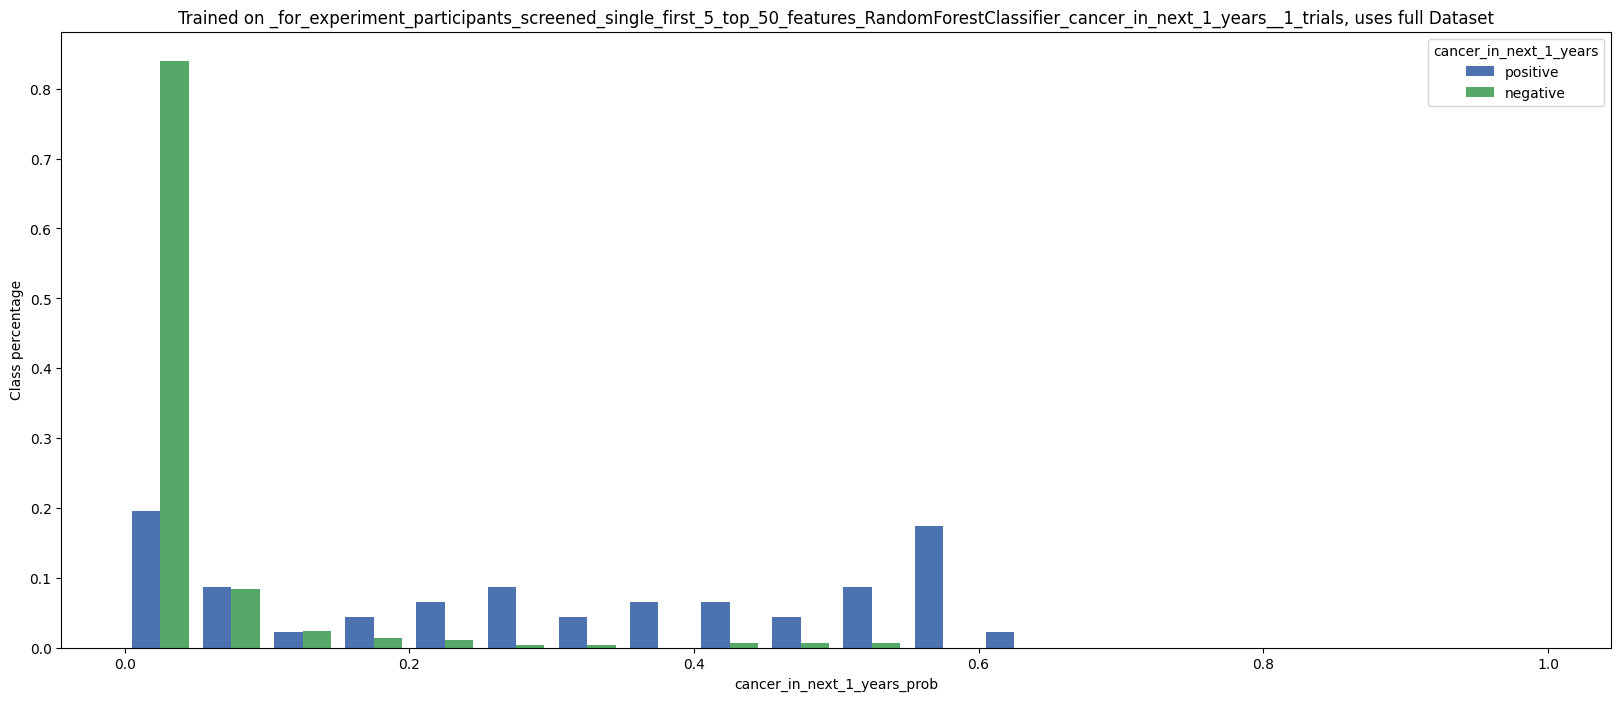

In [134]:
thresholds = per_thereshold_metrics["Threshold"].to_list()[1:-1]
for threshold in thresholds:
    print(f"Threshold: {threshold}")
    cv_analytics_util.update_thresholds(threshold)
    cv_analytics_util.get_cv_report();
    cv_analytics_util.display_graph()
label = cv_analytics_util.get_label()
full_dataset = cv_analytics_util.get_dataset_with_predictions()
plot_hist_side_by_side_for_class(full_dataset, label, f'{label}_prob', normalize = True, title=f'Trained on {filesuffix}, uses full Dataset')

In [133]:
# pred, prob = cv_analytics_util.analytics_utils[0].get_predictions_general(X_predict)
# fraction = map_prob_to_bucket(per_thereshold_metrics, prob[0])